## selenium 패키지 활용 데이터 수집

In [1]:
# !pip install selenium 

#### Webdriver 설치를 위한 준비작업 :

1) `Chrome version 확인` :

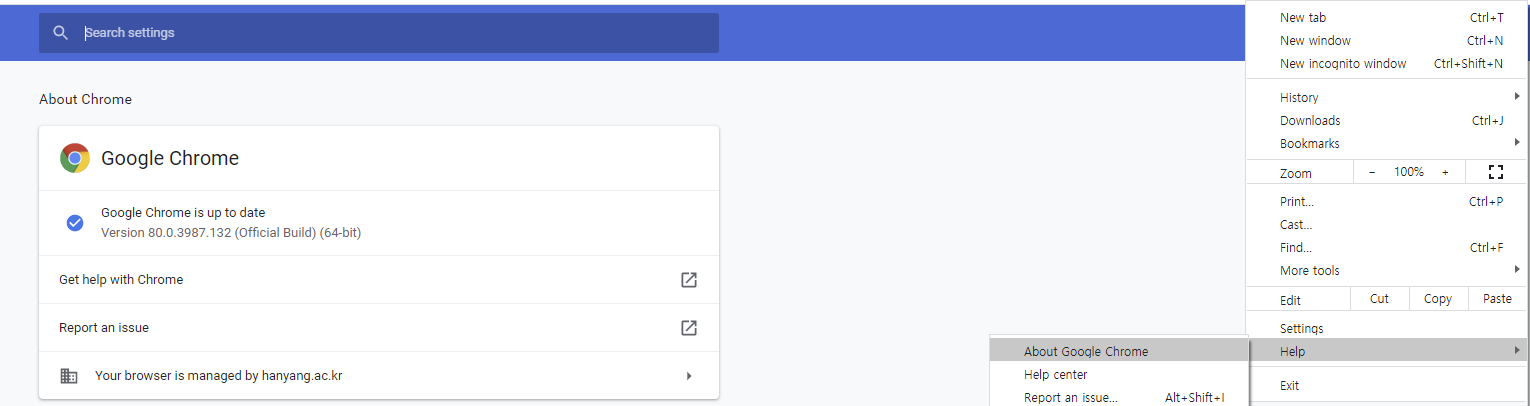



2) `Webdriver 사이트 접속 및 Download` :

https://chromedriver.chromium.org/downloads

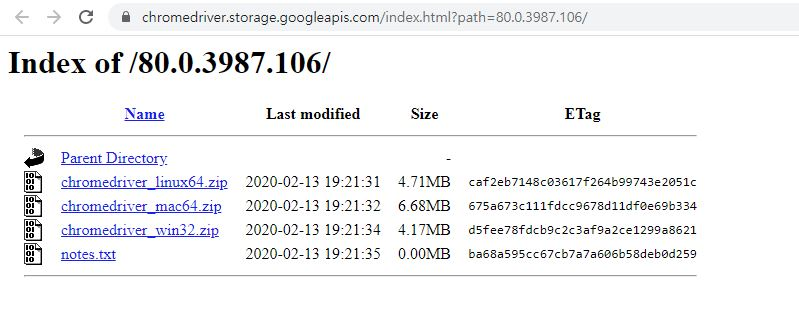


3) `다양한 browser 위한 Webdriver` :

https://selenium-python.readthedocs.io/api.html

##### 패키지 Import 방법 참조 :
- 1) `import pkg_name` : pkg_name 이름의 패키지를 로딩 (일반적 방법)
- 2) `import pkg_name.sub` : pkg_name 와 하위 패키지 sub 까지 로딩 (하위 패키지까지 로딩할 경우)
- 3) `from pkg_name.sub import abc` : pkg_name와 하위 패키지 sub 에다가 abc 모듈 또는 함수까지 로딩

## (1) 네이버 바이크 정보 크롤링 : 
**'현재 사이트 삭제됨'**

#### 참고 :  https://auto.naver.com/bike/mainList.nhn

In [2]:
# from selenium import webdriver
# import time

In [3]:
# # selenium에서 사용할 웹 드라이버 절대 경로 정보

# # chromedriver = 'C:\dev_python\Webdriver\chromedriver.exe'
# # selenum의 webdriver에 앞서 설치한 chromedirver를 연동한다.
# driver = webdriver.Chrome(r"./chromedriver.exe") # r을 붙인 이유는 크롬에서 위치를 가져올 때 오류가 발생할수도 있기에 임시방편

1. 일단 https://auto.naver.com/bike/mainList.nhn 로 이동한다.

In [4]:
# driver로 특정 페이지를 크롤링한다.
# driver.get('https://auto.naver.com/bike/mainList.nhn')

In [5]:
# print("+" * 100)
# print(driver.title)   # 크롤링한 페이지의 title 정보
# print(driver.current_url)  # 현재 크롤링된 페이지의 url
# print("바이크 브랜드 크롤링")
# print("-" * 100)

2. 크롤링 결과에서 전체 제조사 엘리멘트를 찾아서 마우스 클릭하고 그 결과물을 받아온다.

In [6]:
# # 바이크 제조사 전체 페이지 버튼 클릭
# bikeCompanyAllBtn = driver.find_element_by_css_selector("#container > div.spot_main > div.spot_aside > div.tit > a")
# bikeCompanyAllBtn.click()
# time.sleep(3) #과도하게 크롤링하는 경우 차단할 수 있기때문에 time.sleep을 이용하여 중간에 버퍼링 시간을 줌(기계가 아님을 인식시킴)

3. 바이크 제조사 정보를 크롤링 한다.

In [7]:
# # 바이크 제조사 1번 페이지 진입해서 바이크 리스트 추출
# allBikeCompanyElement = driver.find_elements_by_css_selector(
#     "#_vendor_select_layer > div > div.maker_group div.emblem_area > ul > li")

In [8]:
# # 바이크 첫 페이지 크롤링
# for item in allBikeCompanyElement:
#     bikeComName = item.find_element_by_tag_name("span").text
#     if (bikeComName != ''):
#         print("바이크 회사명:" + bikeComName)
#         ahref = item.find_element_by_tag_name("a").get_attribute("href")
#         print('네이버 자동차 바이크제조사 홈 sub url:', ahref)
#         imgUrl = item.find_element_by_tag_name("img").get_attribute("src")
#         print('바이크 회사 엠블럼:', imgUrl)

# time.sleep(3)

4. 다음 페이지 버튼이 활성화 되어 있다면 클릭하고 그 결과물을 받아온다.(추가 제조사 정보 있음)

In [9]:
# # 바이크 제조사 리스트의 다음 페이지 버튼을 찾아서 클릭하자.
# nextBtn = driver.find_element_by_css_selector(
#     "#_vendor_select_layer > div > div.maker_group > div.rolling_btn > button.next")

5. 다음 페이지 버튼이 비 활성화 되어 있다면 크롤링을 중지한다.(더이상 제조사 정보 없음)

In [10]:
# # 다음 바이크 제조사 페이지 버튼이 활성화 여부
# isExistNextPage = nextBtn.is_enabled()

# if (isExistNextPage == True):
#     print("다음 페이지 존재함=======================================>")
#     nextBtn.click()
#     allBikeCompanyElement = driver.find_elements_by_css_selector(
#         "#_vendor_select_layer > div > div.maker_group div.emblem_area > ul > li")
#     for item in allBikeCompanyElement:
#         bikeComName = item.find_element_by_tag_name("span").text
#         if (bikeComName != ''):
#             print("바이크 회사명:" + bikeComName)
#             ahref = item.find_element_by_tag_name("a").get_attribute("href")
#             print('네이버 자동차 바이크제조사 홈 sub url:', ahref)
#             imgUrl = item.find_element_by_tag_name("img").get_attribute("src")
#             print('바이크 회사 엠블럼:', imgUrl)

In [11]:
# # 크롤링이 끝나면 webdriver 브라우저를 종료한다.
# driver.quit()

## (2) 한국거래소 기업공시채널 상장법인 목록 읽기

 - 파일을 직접 다운받은 후 가져올 수 있지만 사이트에서 직접 파일을 가져올 수 있음

#### 참고 :  https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage

![KIND](data/kind.jpg)

### 한국거래소 기업공시채널(kind.krx.co.kr) > 상장법인상세정보 > 상장법인목록 > EXCEL 다운로드

![KIND](data/kind_excel.jpg)

### 그런데, EXCEL 파일 같지만 메모장으로 열어보면 HTML 형태 !!!

![KIND](data/kind_notepad.jpg)

### 그러므로, 판다스 read_html()로 데이터를 읽어야함

In [12]:
# !pip install html5lib

In [13]:
# !pip install lxml

In [14]:
import pandas as pd
krx_list = pd.read_html("data/상장법인목록.xls")

In [15]:
krx_list

[             회사명    종목코드                   업종  \
 0          HK이노엔  195940              의약품 제조업   
 1         PI첨단소재  178920           플라스틱제품 제조업   
 2          카카오뱅크  323410            은행 및 저축기관   
 3     한화플러스제2호스팩  386580           금융 지원 서비스업   
 4           에브리봇  270660           가정용 기기 제조업   
 ...          ...     ...                  ...   
 2446      CJ대한통운     120            도로 화물 운송업   
 2447       메리츠화재      60                  보험업   
 2448          경방      50               종합 소매업   
 2449       유수홀딩스     700  회사 본부 및 경영 컨설팅 서비스업   
 2450    한진중공업홀딩스    3480    연료용 가스 제조 및 배관공급업   
 
                                                    주요제품         상장일  결산월  \
 0                                         전문의약품, 숙취해소음료  2021-08-09  12월   
 1                                       PI(Polyimide)필름  2021-08-09  12월   
 2                                            은행 및 금융서비스  2021-08-06  12월   
 3                                                     -  2021-08-05  12월   
 4           

In [16]:
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,HK이노엔,195940,의약품 제조업,"전문의약품, 숙취해소음료",2021-08-09,12월,강석희,http://www.inno-n.com,서울특별시
1,PI첨단소재,178920,플라스틱제품 제조업,PI(Polyimide)필름,2021-08-09,12월,김태림,http://www.pimaterials.com/main/index.jsp.html,충청북도
2,카카오뱅크,323410,은행 및 저축기관,은행 및 금융서비스,2021-08-06,12월,윤호영,NaN,경기도
3,한화플러스제2호스팩,386580,금융 지원 서비스업,-,2021-08-05,12월,이동헌,http://hanwha-plus-no2spac.com,서울특별시
4,에브리봇,270660,가정용 기기 제조업,"물걸레 로봇청소기, 흡입형 로봇청소기",2021-07-28,12월,정우철,NaN,경기도
...,...,...,...,...,...,...,...,...,...
2446,CJ대한통운,120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2447,메리츠화재,60,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2448,경방,50,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2449,유수홀딩스,700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [17]:
krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format) #종목코드를 6자리로 바꿈

In [18]:
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,HK이노엔,195940,의약품 제조업,"전문의약품, 숙취해소음료",2021-08-09,12월,강석희,http://www.inno-n.com,서울특별시
1,PI첨단소재,178920,플라스틱제품 제조업,PI(Polyimide)필름,2021-08-09,12월,김태림,http://www.pimaterials.com/main/index.jsp.html,충청북도
2,카카오뱅크,323410,은행 및 저축기관,은행 및 금융서비스,2021-08-06,12월,윤호영,NaN,경기도
3,한화플러스제2호스팩,386580,금융 지원 서비스업,-,2021-08-05,12월,이동헌,http://hanwha-plus-no2spac.com,서울특별시
4,에브리봇,270660,가정용 기기 제조업,"물걸레 로봇청소기, 흡입형 로봇청소기",2021-07-28,12월,정우철,NaN,경기도
...,...,...,...,...,...,...,...,...,...
2446,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2447,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2448,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2449,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [19]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')[0]

In [20]:
print(pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'))

[            회사명    종목코드               업종  \
0         DRB동일    4840         고무제품 제조업   
1           DSR  155660      1차 비철금속 제조업   
2            GS   78930           기타 금융업   
3     HDC현대산업개발  294870           건물 건설업   
4         KG케미칼    1390      기초 화학물질 제조업   
...         ...     ...              ...   
2562     코스텍시스템  169670    특수 목적용 기계 제조업   
2563       타임기술  318660   소프트웨어 개발 및 공급업   
2564   플럼라인생명과학  222670  자연과학 및 공학 연구개발업   
2565   한국미라클피플사  331660      기타 화학제품 제조업   
2566        휴벡셀  212310       의료용 기기 제조업   

                                               주요제품         상장일  결산월  \
0                 고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매  1976-05-21  12월   
1                                            합섬섬유로프  2013-05-15  12월   
2                                       지주회사/부동산 임대  2004-08-05  12월   
3                            외주주택, 자체공사, 일반건축, 토목 등  2018-06-12  12월   
4                         콘크리트혼화제, 비료, 친환경농자재, 수처리제  1989-08-25  12월   
...                                   

In [21]:
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,"곽정현, 김재익",http://www.kgchem.co.kr,울산광역시


In [22]:
df['종목코드'] = df['종목코드'].map('{:06d}'.format) #위와 같이 종목코드를 6자리로 바꿈

In [23]:
df = df.sort_values(by='종목코드')

In [24]:
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
31,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,"유준하, 한종현(각자 대표이사)",http://www.dong-wha.co.kr,서울특별시
342,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,노성석,http://www.krmotors.com,경상남도
1598,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
37,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
48,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시


## (3) 주식 종가 차트 그리기

In [25]:
# !pip install mplfinance
# !pip install xmltodict

In [26]:
from urllib.request import urlopen
import numpy as np
import lxml
import requests
import json
import xmltodict
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# json을 활용한 데이터 크롤링
url='https://fchart.stock.naver.com/sise.nhn?symbol=005930&timeframe=day&count=200&requestType=0'
rs=requests.get(url)
dt=xmltodict.parse(rs.text)
js=json.dumps(dt)
js=json.loads(js)

In [28]:
data=pd.json_normalize(js['protocol']['chartdata']['item'])

In [29]:
data #2021년 01월 20일 / 시가 고가 저가 종가 ....

,@data
0,20220310|70800|71200|70500|71200|21159248
1,20220311|70500|70700|69700|70000|15787655
2,20220314|70000|70200|69600|70200|9040993
3,20220315|69800|70100|69500|69500|10258562
4,20220316|70200|70500|69700|70400|10175750
...,...
195,20221220|59000|59100|58500|58600|9284761
196,20221221|58700|59100|58000|58000|10356971
197,20221222|58100|59100|58100|59100|10720630
198,20221223|58200|58400|57700|58100|9829407


In [30]:
df=data['@data'].str.split('|', expand=True)
df.columns=['Date','Open','High','Low','Close','Volume']
df

,Date,Open,High,Low,Close,Volume
0,20220310,70800,71200,70500,71200,21159248
1,20220311,70500,70700,69700,70000,15787655
2,20220314,70000,70200,69600,70200,9040993
3,20220315,69800,70100,69500,69500,10258562
4,20220316,70200,70500,69700,70400,10175750
...,...,...,...,...,...,...
195,20221220,59000,59100,58500,58600,9284761
196,20221221,58700,59100,58000,58000,10356971
197,20221222,58100,59100,58100,59100,10720630
198,20221223,58200,58400,57700,58100,9829407


In [31]:
# 데이터 handling
df['Open']=pd.to_numeric(df['Open'])
df['High']=pd.to_numeric(df['High'])
df['Low']=pd.to_numeric(df['Low'])
df['Close']=pd.to_numeric(df['Close'])
df['Volume']=pd.to_numeric(df['Volume'])
df_final=df[['Open','High','Low','Close','Volume']]
df_final_time=pd.DatetimeIndex(df['Date'])
df_final.index=df_final_time

In [32]:
df

,Date,Open,High,Low,Close,Volume
0,20220310,70800,71200,70500,71200,21159248
1,20220311,70500,70700,69700,70000,15787655
2,20220314,70000,70200,69600,70200,9040993
3,20220315,69800,70100,69500,69500,10258562
4,20220316,70200,70500,69700,70400,10175750
...,...,...,...,...,...,...
195,20221220,59000,59100,58500,58600,9284761
196,20221221,58700,59100,58000,58000,10356971
197,20221222,58100,59100,58100,59100,10720630
198,20221223,58200,58400,57700,58100,9829407


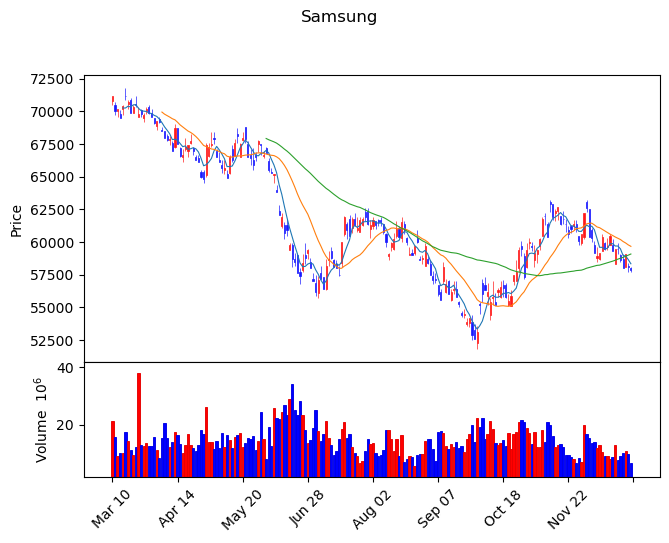

In [33]:
# 시각화
kwargs=dict(title="Samsung", type='candle',mav=(5,20,60), volume=True)
mc=mpf.make_marketcolors(up='red', down='blue', inherit=True)
style_final=mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df_final, **kwargs, style=style_final)
plt.show()

## (3) 네이버 주식정보 가져오기

#### 참고 : https://cocoabba.tistory.com/20

In [34]:
import requests
from bs4 import BeautifulSoup

In [35]:
url = "https://finance.naver.com/sise/sise_market_sum.nhn?page=1"

res = requests.get(url)
# res.text
# text부분이 깨지는것을 볼 수 있음

In [36]:
soup = BeautifulSoup(res.text, 'lxml') 
# text형태가 lxml 형태라고 지정

# print (soup)

In [37]:
stock_head = soup.find("thead").find_all("th")
data_head = [head.get_text() for head in stock_head]

print(data_head)

['N', '종목명', '현재가', '전일비', '등락률', '액면가', '시가총액', '상장주식수', '외국인비율', '거래량', 'PER', 'ROE', '토론실']


In [38]:
stock_list = soup.find("tbody").find_all("tr")
# stock_list

In [39]:
stock_list[0]  #페이지의 N / 종목명 / 현재가 .... 가 있는 바로 아랫줄인 실선임

<tr><td class="blank_08" colspan="10"></td></tr>

In [40]:
for stock in stock_list:
     if len(stock) > 1 :
          print(stock.get_text().split())

['1', '삼성전자', '57,900', '200', '-0.34%', '100', '3,456,504', '5,969,783', '49.79', '6,738,126', '9.39', '13.92']
['2', 'LG에너지솔루션', '457,500', '2,000', '+0.44%', '500', '1,070,550', '234,000', '5.16', '147,801', '186.43', '10.68']
['3', '삼성바이오로직스', '822,000', '16,000', '+1.99%', '2,500', '585,050', '71,174', '10.86', '45,594', '111.59', '8.21']
['4', 'SK하이닉스', '77,000', '800', '-1.03%', '5,000', '560,562', '728,002', '49.75', '1,406,359', '6.04', '16.84']
['5', 'LG화학', '618,000', '8,000', '+1.31%', '5,000', '436,261', '70,592', '48.14', '98,931', '21.75', '18.47']
['6', '삼성전자우', '52,200', '300', '-0.57%', '100', '429,547', '822,887', '71.68', '381,036', '8.47', 'N/A']
['7', '삼성SDI', '624,000', '2,000', '+0.32%', '5,000', '429,091', '68,765', '47.30', '124,315', '25.59', '8.45']
['8', '현대차', '158,000', '1,000', '+0.64%', '5,000', '337,596', '213,668', '28.57', '386,384', '7.05', '6.84']
['9', 'NAVER', '178,500', '500', '+0.28%', '100', '292,828', '164,049', '48.28', '349,026', '31.45', '

In [41]:
print(stock_list[1].get_text().split()) # split()을 하는 경우, % 을 쓰는경우와 다르게 \n\t와 같이 필요없는 부분들을 없애줌
print('')
print(stock_list[1].get_text().split('%'))

['1', '삼성전자', '57,900', '200', '-0.34%', '100', '3,456,504', '5,969,783', '49.79', '6,738,126', '9.39', '13.92']

['\n1\n삼성전자\n57,900\n\n\n\t\t\t\t200\n\t\t\t\t\n\n\n\n\t\t\t\t-0.34', '\n\t\t\t\t\n\n100\n3,456,504\n5,969,783\n49.79\n6,738,126\n9.39\n13.92\n\n']
